In [1]:
a = [1,2,1]

In [2]:
a

[1, 2, 1]

In [3]:
set(a)

{1, 2}

In [4]:
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets
iris = datasets.load_iris()

In [5]:
from sklearn import decomposition
pca = decomposition.PCA()

In [6]:
iris_X = iris.data

In [7]:
iris_pca = pca.fit_transform(iris_X)

In [8]:
iris_pca[:5]

array([[ -2.68420713e+00,   3.26607315e-01,  -2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,  -1.69556848e-01,  -2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,  -1.37345610e-01,   2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,  -3.11124316e-01,   3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,   3.33924564e-01,   9.62296998e-02,
         -6.31287327e-02]])

In [9]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

In [10]:
pca = decomposition.PCA(n_components=2)

In [11]:
iris_X_prime = pca.fit_transform(iris_X)

In [12]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [13]:
import matplotlib.pyplot as plt

In [14]:
x = range(0,len(iris_X_prime))
import numpy as np

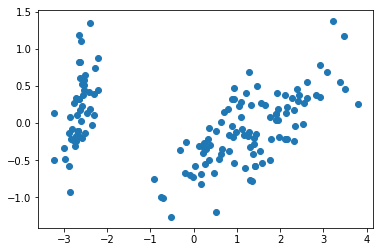

In [27]:
plt.scatter(iris_X_prime[:,0], iris_X_prime[:,1])
plt.show()

In [16]:
from sklearn.cluster import KMeans

In [17]:
from scipy.spatial.distance import cdist
K = range(1,10)
meandistortions=[]
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris_X_prime)
    meandistortions.append(sum(np.min(
                cdist(iris_X_prime,kmeans.cluster_centers_,
                     'euclidean'),axis=1))/iris_X_prime.shape[0])

Text(0.5,0,'k')

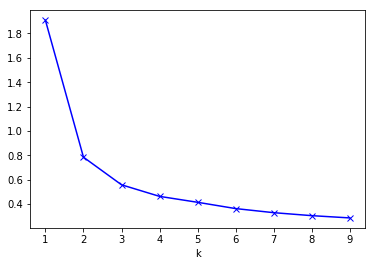

In [18]:
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')

In [19]:
from sklearn import metrics

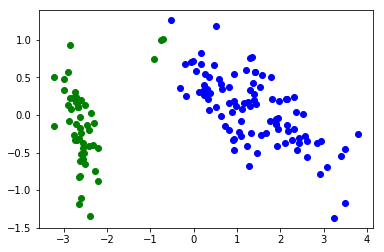

In [29]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
kmeans_model = KMeans(n_clusters=2).fit(iris_X_prime)
for i,l in enumerate(kmeans_model.labels_):
    plt.plot(iris_X_prime[:,0][i],-iris_X_prime[:,1][i],color=colors[l],marker='o',ls='None')